In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC ## supprot vector Classifier
from sklearn.metrics import confusion_matrix ## cf in form of actual matrix
from sklearn.metrics import plot_confusion_matrix ## ploting confusin matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits ## loading sklearn digits data
from sklearn.preprocessing import scale ## to scale and center
from sklearn.decomposition import PCA ## principle component perform to covert into 2d plot
from sklearn.model_selection import GridSearchCV
%matplotlib inline
sns.set()

In [6]:
digits = load_digits()

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
df = pd.DataFrame(data = digits.data, index =  digits.target)

## create df

In [9]:
df["target"] = digits.target

In [10]:
df.head()

## now df os complete

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [33]:
## Divide input and target

X = df.drop("target", axis = 1)
y = df["target"]

In [34]:
## Assign model

In [35]:
model = SVC()

In [36]:
## Split Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [37]:
## fit the model

model.fit(X_train, y_train)

SVC()

In [38]:
## make prediction

y_prediction = model.predict(X_test)

y_prediction

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 9, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [39]:
cf1 = confusion_matrix(y_test, y_prediction)

cf1

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 46]], dtype=int64)

<Figure size 2520x2520 with 0 Axes>

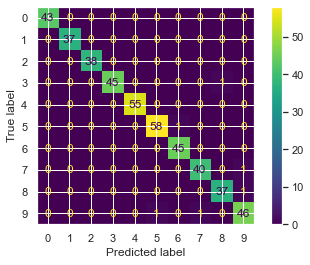

In [40]:
plt.figure(figsize = (35,35))

cf = plot_confusion_matrix(model, X_test, y_test )

In [41]:
## Score

model.score(X_test, y_test)

0.9866666666666667

In [42]:
## Optimizing SVM is all about fitting the best values of gamma and C and to validate 2 values at a time GridSearchCV is
## the best method. it will try all possible values combination

In [43]:
para_grid = [
    
    {
        "C" : [0.5, 1, 10, 100],
        "gamma" : ["scale", 1, 0.1, 0.001, 0.0001],
        "kernel" : ["rbf"]
    }
]

In [49]:
optimal_para = GridSearchCV(
    
    SVC(),
    para_grid,
    cv = 5,
    scoring = "accuracy",
    verbose = 0
)

In [50]:
optimal_para.fit(X_train, y_train)

## this will take long time

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [51]:
optimal_para.best_params_

## printing best parameters 

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [52]:
## fit and run the model with the new values

model = SVC(C = 10, gamma = "scale", random_state =42)

In [53]:
model.fit(X_train, y_train)

SVC(C=10, random_state=42)

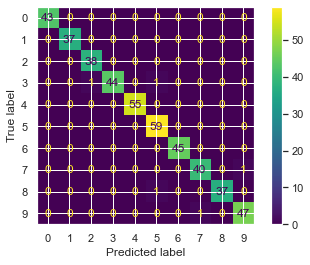

In [54]:
cf = plot_confusion_matrix(model, X_test, y_test )

In [55]:
model.score(X_test, y_test)

## Now the accuracy has been increased

0.9888888888888889

In [56]:
cf1 = confusion_matrix(y_test, y_prediction)

cf1

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 46]], dtype=int64)

In [58]:
from sklearn.model_selection import RandomizedSearchCV

optimal_para1 = RandomizedSearchCV(
    
    SVC(),
    para_grid,
    cv = 5,
    scoring = "accuracy",
    n_iter = 2 ## important
)

In [59]:
optimal_para1.fit(X_train, y_train)

## this one is faster than GridSearch because number of iterations are depend on us

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=2,
                   param_distributions=[{'C': [0.5, 1, 10, 100],
                                         'gamma': ['scale', 1, 0.1, 0.001,
                                                   0.0001],
                                         'kernel': ['rbf']}],
                   scoring='accuracy')

In [61]:
optimal_para1.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 1}